In [1]:
import pandas as pd #to read the data from csv files
import numpy as np #its used to work with arrays which are single or multi dimesniosn array
import matplotlib.pyplot as plt #
import seaborn as sns
%matplotlib inline 

In [2]:
data=pd.read_csv('titanic_train.csv')

In [3]:
data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


# Exploratory data analysis

   #missing data
   
   
#we can use seaborb to see where we have missing data

In [4]:
data.isnull().sum

<bound method DataFrame.sum of      passenger_id  pclass   name    sex    age  sibsp  parch  ticket   fare  \
0           False   False  False  False   True  False  False   False  False   
1           False   False  False  False  False  False  False   False  False   
2           False   False  False  False  False  False  False   False  False   
3           False   False  False  False  False  False  False   False  False   
4           False   False  False  False  False  False  False   False  False   
..            ...     ...    ...    ...    ...    ...    ...     ...    ...   
845         False   False  False  False  False  False  False   False  False   
846         False   False  False  False  False  False  False   False  False   
847         False   False  False  False  False  False  False   False  False   
848         False   False  False  False  False  False  False   False  False   
849         False   False  False  False  False  False  False   False  False   

     cabin  embarked

<AxesSubplot:>

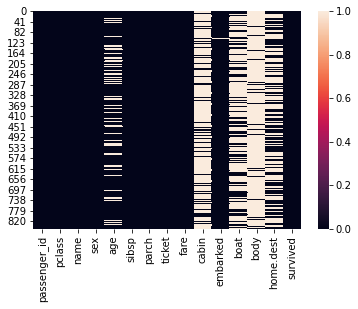

In [5]:
sns.heatmap(data.isnull())

In [6]:
data= data.drop(['boat','body','home.dest'], axis=1) #we drop data because we have >50% missing values in that columns 

In [7]:
data

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,0


<AxesSubplot:>

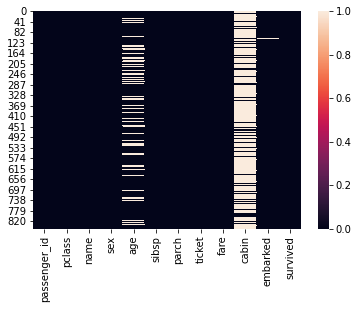

In [8]:
sns.heatmap(data.isnull())

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

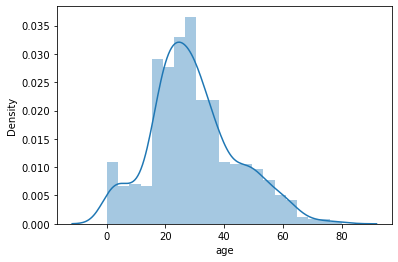

In [9]:
sns.distplot(data['age'])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

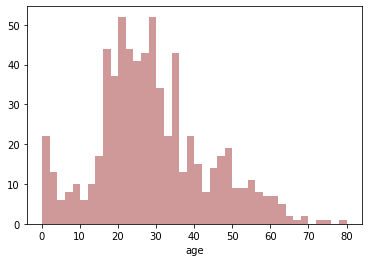

In [10]:
sns.distplot (data['age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

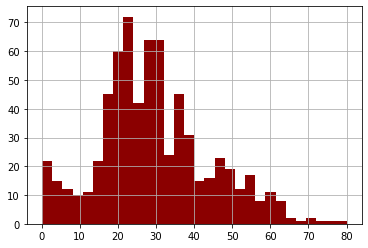

In [11]:
data['age'].hist(bins=30,color='darkred')

<AxesSubplot:xlabel='survived', ylabel='count'>

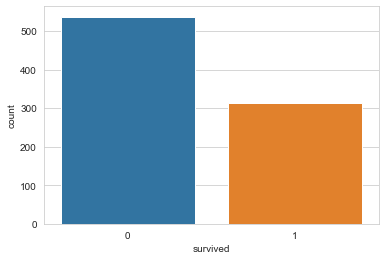

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=data)

<AxesSubplot:xlabel='survived', ylabel='count'>

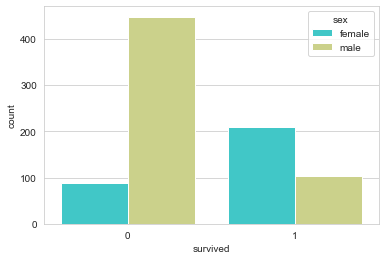

In [13]:
sns.set_style('whitegrid')
sns.countplot (x='survived',hue='sex',data=data,palette='rainbow')

<AxesSubplot:xlabel='sibsp', ylabel='count'>

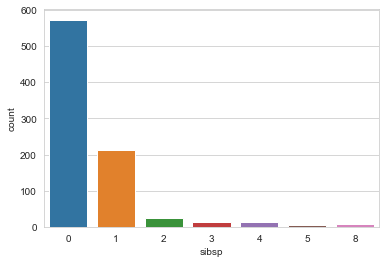

In [14]:
sns.countplot(x='sibsp',data=data)

<AxesSubplot:>

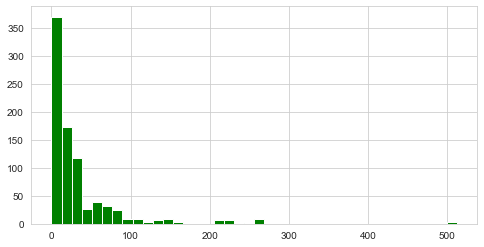

In [15]:
data['fare'].hist(color='green',bins=40,figsize=(8,4))

# Data Cleaning




We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='pclass', ylabel='age'>

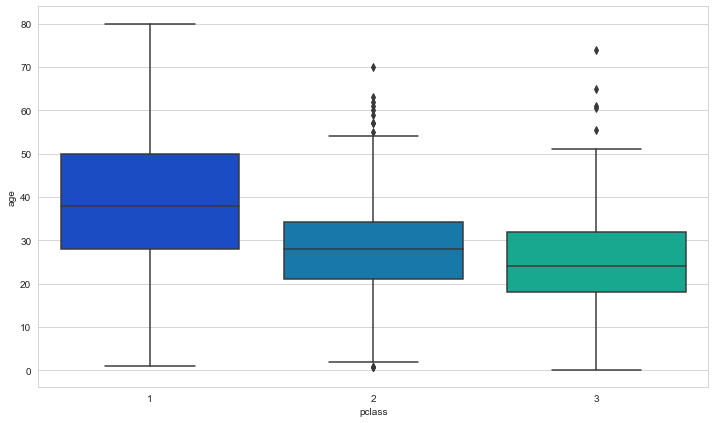

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='pclass',y='age',data=data,palette='winter')

In [17]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):

        if pclass == 1:
            return 37

        elif pclass == 2:
            return 29

        else:
            return 24

    else:
        return age

In [18]:
data['age'] = data[['age','pclass']].apply(impute_age,axis=1)


<AxesSubplot:>

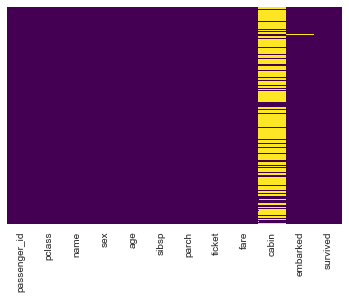

In [19]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
data.drop('cabin',axis=1,inplace=True)

In [23]:
data = data .dropna()

In [24]:
data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,24.0,0,0,335432,7.7333,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,0


<AxesSubplot:>

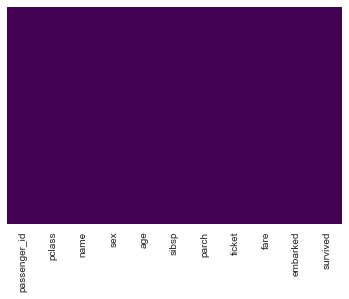

In [25]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Converting Categorical Features

In [26]:
pd.get_dummies(data['embarked'],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [27]:
sex = pd.get_dummies(data['sex'],drop_first=True)
embark = pd.get_dummies(data['embarked'],drop_first=True)

In [28]:
data

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,24.0,0,0,335432,7.7333,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,0
...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,S,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,C,0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,S,1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S,0


In [29]:
data.drop(['sex','embarked','name','ticket'],axis=1,inplace=True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
data.head()

,passenger_id,pclass,age,sibsp,parch,fare,survived
0,1216,3,24.0,0,0,7.7333,1
1,699,3,38.0,0,0,8.6625,0
2,1267,3,30.0,1,1,24.1500,0
3,449,2,54.0,1,3,23.0000,1
4,576,2,40.0,0,0,13.0000,0


In [31]:

data = pd.concat([data,sex,embark],axis=1)

In [32]:
data

,passenger_id,pclass,age,sibsp,parch,fare,survived,male,Q,S
0,1216,3,24.0,0,0,7.7333,1,0,1,0
1,699,3,38.0,0,0,8.6625,0,1,0,1
2,1267,3,30.0,1,1,24.1500,0,0,0,1
3,449,2,54.0,1,3,23.0000,1,0,0,1
4,576,2,40.0,0,0,13.0000,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
845,158,1,55.0,0,0,50.0000,0,1,0,1
846,174,1,58.0,0,0,29.7000,0,1,0,0
847,467,2,24.0,1,0,26.0000,1,0,0,1
848,1112,3,3.0,1,1,13.7750,0,0,0,1


# Building a Logistic Regression model¶

In [33]:
data.drop('survived',axis=1).head()

,passenger_id,pclass,age,sibsp,parch,fare,male,Q,S
0,1216,3,24.0,0,0,7.7333,0,1,0
1,699,3,38.0,0,0,8.6625,1,0,1
2,1267,3,30.0,1,1,24.1500,0,0,1
3,449,2,54.0,1,3,23.0000,0,0,1
4,576,2,40.0,0,0,13.0000,1,0,1


In [34]:

data['survived'].head()

0    1
1    0
2    0
3    1
4    0
Name: survived, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('survived',axis=1), 
                                                    data['survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
predictions = logmodel.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix


In [44]:
accuracy=confusion_matrix(y_test,predictions)

In [45]:
accuracy

array([[138,  29],
       [ 33,  55]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:

accuracy=accuracy_score(y_test,predictions)
accuracy

0.7568627450980392

In [48]:
predictions

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)